## LIGN 167: Problem Set 2
### Name: Chih-Hsuan Kao
### Date: Oct 18, 2018

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    #Numerically stable sigmoid function.
    #Taken from: https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = np.exp(x)
        return z / (1 + z)

In [3]:
def sample_logistic_distribution(x,a):
    #np.random.seed(1)
    num_samples = len(x)
    y = np.empty(num_samples)
    for i in range(num_samples):
        y[i] = np.random.binomial(1,logistic_positive_prob(x[i],a))
    return y

In [4]:
def create_input_values(dim,num_samples):
    #np.random.seed(100)
    x_inputs = []
    for i in range(num_samples):
        x = 10*np.random.rand(dim)-5
        x_inputs.append(x)
    return x_inputs

In [5]:
def create_dataset():
    x= create_input_values(2,100)
    a=np.array([10,10])
    y=sample_logistic_distribution(x,a)

    return x,y

In [6]:
# PROBLEM 1
#time vector OK
def logistic_positive_prob(x,a):
    return sigmoid(np.inner(x,a))

In [7]:
# PROBLEM 2
#formula 10
def logistic_derivative_per_datapoint(y_i,x_i,a,j):
    return -(y_i - logistic_positive_prob(x_i, a))*x_i[j]

In [8]:
# PROBLEM 3 
#Equation 12
def logistic_partial_derivative(y,x,a,j):
    sum= 0
    for i in range(len(x)):
        sum = sum + logistic_derivative_per_datapoint(y[i],x[i],a,j)
    return sum

In [9]:
# PROBLEM 4
# a=length k np, y=length n np, x=n lists, each list contain a k length np array.
# return partial derivative of loss function
def compute_logistic_gradient(a,y,x):
    b = np.ones(len(a))
    for i in range(len(a)):
        b[i] = logistic_partial_derivative(y,x,a,i)
    return b

In [10]:
# PROBLEM 5
#a=length k np array, lr=learnig rate, gradient=np array of length k
def gradient_update(a,lr,gradient):
    return a - lr*gradient

In [11]:
# PROBLEM 6
#initial_a=np array of length k, lr = learning rate, y=np array of length n, x=n lists, each list contains a np len k
# return a of gradient descent logistic
def gradient_descent_logistic(initial_a,lr,num_iterations,y,x):
    a = initial_a
    for i in range(num_iterations):
        a = gradient_update(initial_a, lr, compute_logistic_gradient(a,y,x))
        initial_a = a
    return a
    

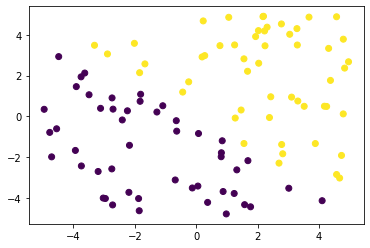

In [12]:
# PROBLEM 7
# Please include your generated graphs in this zipped folder when you submit.
# Comment out your calls to matplotlib (e.g. plt.show()) before submitting
import matplotlib.pyplot as plt
x,y = create_dataset()
x1=np.ones(100)
x2=np.ones(100)
for i in range(100):
    x1[i] = x[i][0]
    x2[i] = x[i][1]
x1 = np.reshape(x1,100)
x2 = np.reshape(x2,100)

plt.scatter(x1,x2,c=y)
plt.show()

In [13]:
# PROBLEM 8
# Free Response Answer Here: 
x,y = create_dataset()
initial_a = np.ones(2) * -1
lr = 0.01
num_iterations = 1000
a = gradient_descent_logistic(initial_a,lr,num_iterations,y,x)
print("-1 -1: ", a)

-1 -1:  [6.17092594 5.87946832]


In [14]:
# PROBLEM 9
# Free Response Answer Here: 
#x,y = create_dataset()
initial_a = np.ones(2)
a[1] = 0
lr = 0.01
num_iterations = 1000
a = gradient_descent_logistic(initial_a,lr,num_iterations,y,x)
print("1 0: ", a)
#x,y = create_dataset()
initial_a = np.zeros(2)
a[1] = -1
lr = 0.01
num_iterations = 1000
a = gradient_descent_logistic(initial_a,lr,num_iterations,y,x)
print("0 -1: ", a)

1 0:  [6.18185856 5.88986881]
0 -1:  [6.17501121 5.88335474]


In [15]:
# PROBLEM 10
# Free Response Answer Here: 
#x,y = create_dataset()
initial_a = np.ones(2) * -1
lr = 0.1
num_iterations = 1000
a = gradient_descent_logistic(initial_a,lr,num_iterations,y,x)
print("lr=0.1 -1 -1: ", a)
#x,y = create_dataset()
initial_a = np.ones(2)
a[1] = 0
lr = 0.001
num_iterations = 1000
a = gradient_descent_logistic(initial_a,lr,num_iterations,y,x)
print("lr=0.001 -1 -1: ", a)


lr=0.1 -1 -1:  [17.78340064 16.94966   ]
lr=0.001 -1 -1:  [2.78167442 2.65778363]


In [16]:
# PROBLEM 11

def logistic_l2_partial_derivative(y,x,a,j):
    sum1 = 0
    for i in range(len(x)):
        sum1 = sum1 + logistic_derivative_per_datapoint(y[i],x[i],a,j)
    var_lambda = 0.1
    
    return sum1 + 2*var_lambda*a[j]

In [17]:
# PROBLEM 12
# a=length k np, y=length n np, x=n lists, each list contain a k length np array.
def compute_logistic_l2_gradient(a,y,x):
    
    return_array = np.ones(len(a))
    for i in range(len(a)):
        return_array[i] = logistic_l2_partial_derivative(y,x,a,i)
    return return_array


In [18]:
# PROBLEM 13
#This is a generalization for problem 6. 
#A gradient descent algorithm which works for optimizing arbitrary functions.

#this is a function that actually runs the gradient descent algorithm for iterations
#will call gradient_fn to compute gradient for EACH iteration
def gradient_descent(initial_a,lr,num_iterations,y,x,gradient_fn):
    return_arr = initial_a
    #As in problem 5 and 6
    for i in range(num_iterations):
        return_arr = return_arr - lr * gradient_fn(initial_a,y,x)
        initial_a = return_arr
    #after all iterations, return final estimate of the paramter of the parameter vector a
    return return_arr
    


In [19]:
# PROBLEM 14

initial_a = np.ones(2)*(-1)
#x,y = create_dataset()

print(gradient_descent(initial_a, 0.01, 1000, y, x, compute_logistic_l2_gradient))


# Free Response Answer Here: 
#smaller?

[3.29889027 3.1487949 ]


In [20]:
# PROBLEM 15

#lambda = 0.1 PROBLEM 14 array is
#array([ 47.3738662  340.51674194])

#lambda = 0.01 PROBLEM 14 array becomes
#array([459.58209309 821.35731469])

##lambda = 1 PROBLEM 14 array becomes
#array([-64.81575187 111.44467607])

##lambda = 10 PROBLEM 14 array becomes
#array([-52.06931485  57.05594827])